<a href="https://colab.research.google.com/github/bcguilherme/arquivos-legais/blob/main/house.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer, power_transform
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as tts
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import set_config
set_config(display="diagram")

Function

In [ ]:
def is_outliers(array, extreme=False):
    q1, q3= np.quantile(array,[.25, .75])
    iqr= q3-q1
    factor= 3 if extreme else 1.5
    upper_outlier = q3 + factor*iqr
    lower_outlier= q1 - factor *iqr
    return( array < lower_outlier) | (array > upper_outlier)

In [ ]:
df=pd.read_csv("/Users/chenyenpin/Downloads/USA_Housing.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
df.shape

(5000, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [ ]:
df.columns=[
    'avg_area_income',
    'avg_area_house_age',
    'avg_area_number_rooms',
    'avga_area_number_of_bedrooms',
    'area_population',
    'Price',
    'address'
    ]

In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame)
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)
    return df[indices_to_keep].astype(np.float64)

In [ ]:
df.head()

,avg_area_income,avg_area_house_age,avg_area_number_rooms,avga_area_number_of_bedrooms,area_population,Price,address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
df.duplicated().any()

False

In [ ]:
df.isna().sum()

avg_area_income                 0
avg_area_house_age              0
avg_area_number_rooms           0
avga_area_number_of_bedrooms    0
area_population                 0
Price                           0
address                         0
dtype: int64

In [ ]:
num_cols=df.select_dtypes("number").columns
target="Price"

In [ ]:
df[target]

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

In [ ]:
df.drop(columns="address", axis=1, inplace=True)

In [ ]:
df

,avg_area_income,avg_area_house_age,avg_area_number_rooms,avga_area_number_of_bedrooms,area_population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


In [ ]:
df.describe(percentiles=[0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99])

,avg_area_income,avg_area_house_age,avg_area_number_rooms,avga_area_number_of_bedrooms,area_population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
1%,43792.673024,3.648537,4.620750,2.020000,13983.282591,4.049730e+05
10%,55047.633980,4.697755,5.681951,2.310000,23502.845262,7.720318e+05
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
90%,82081.188283,7.243978,8.274222,6.100000,48813.618633,1.684621e+06


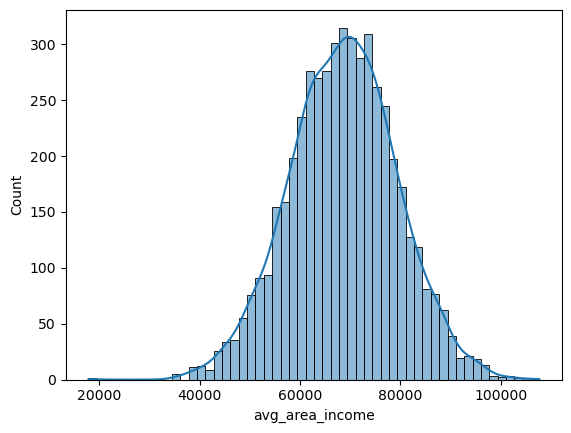

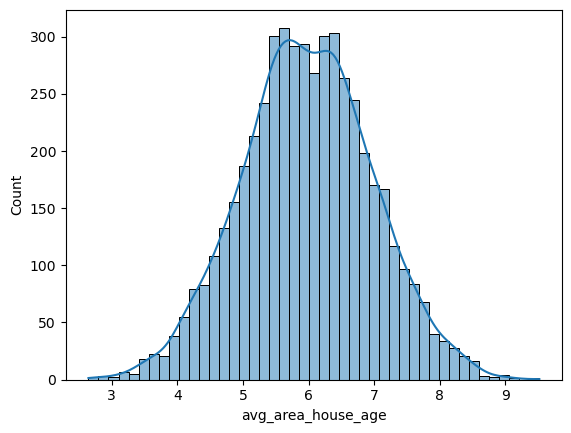

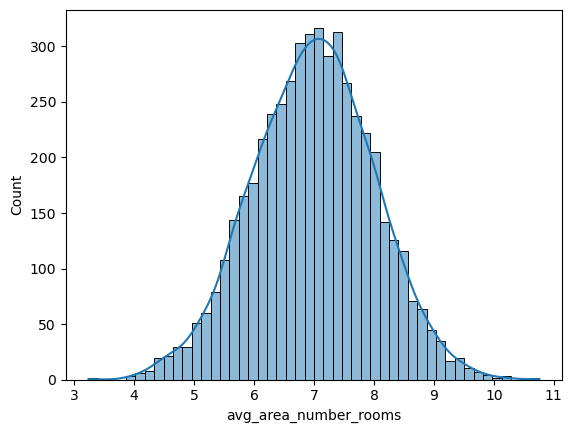

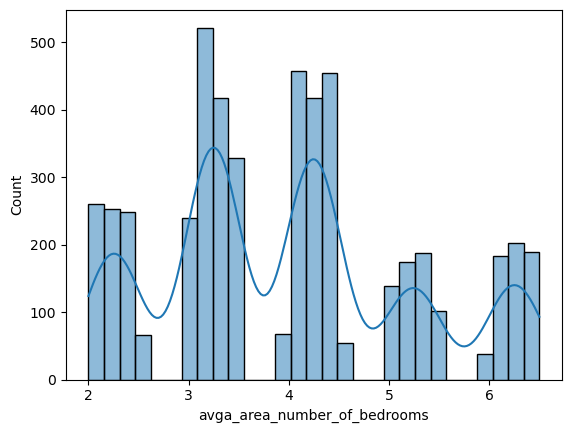

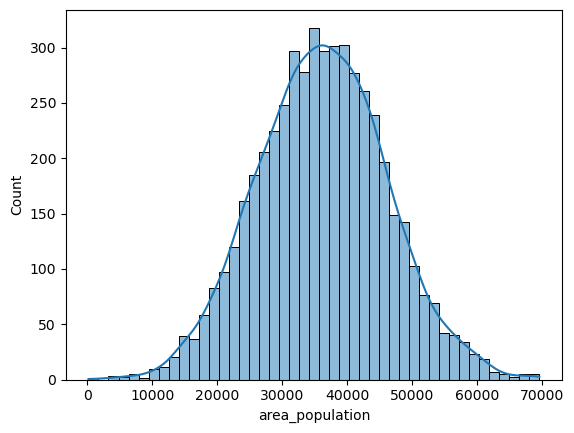

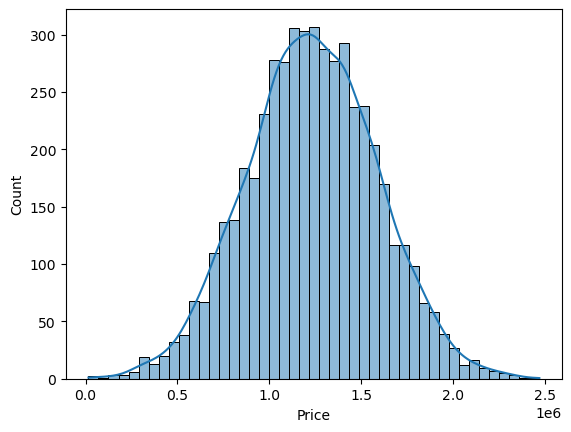

In [ ]:
for num in num_cols:
    sns.histplot(data=df,kde=True, x=num)
    plt.show()

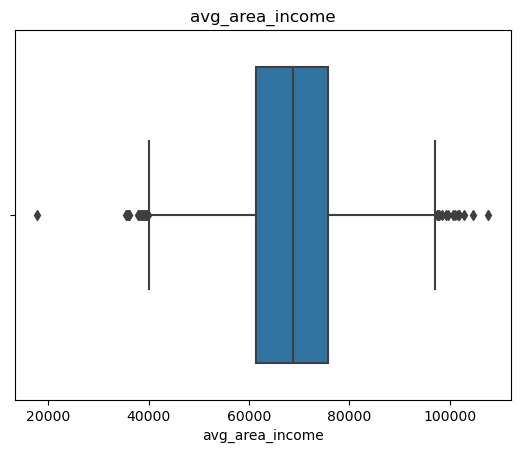

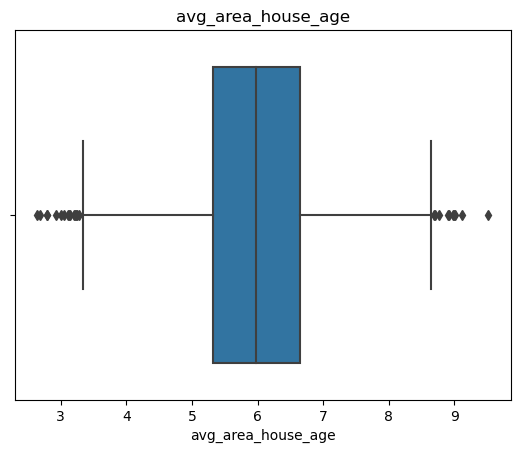

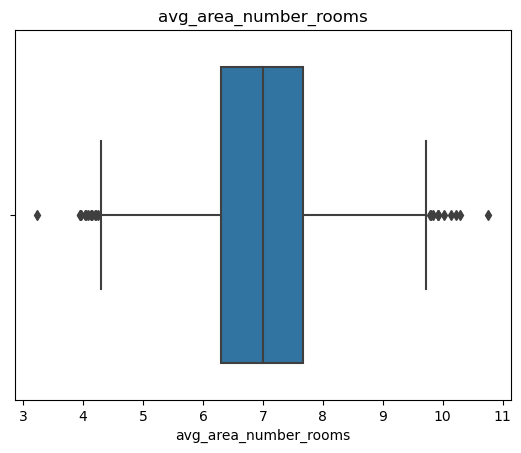

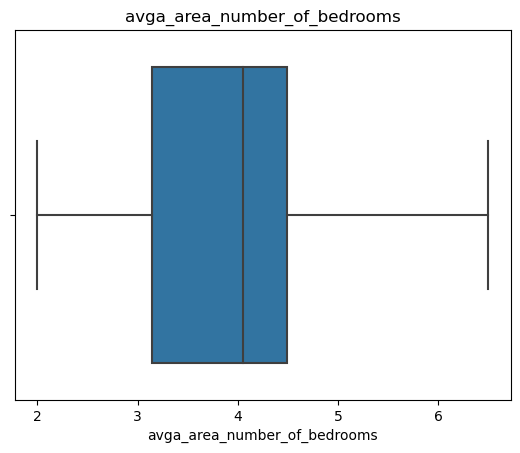

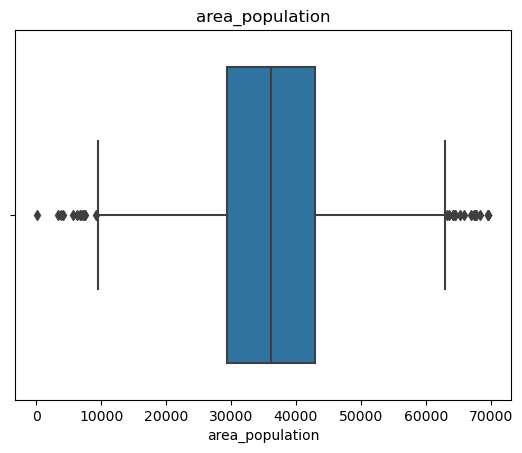

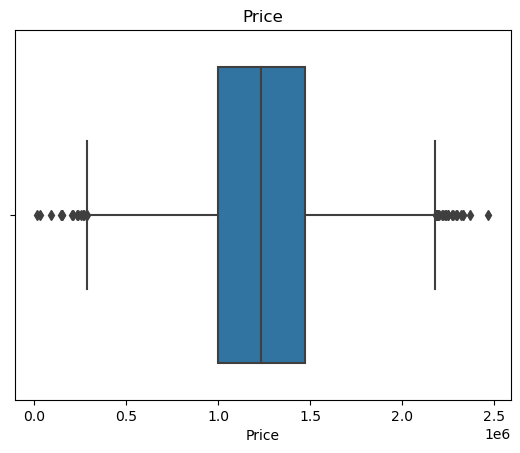

In [ ]:
for num in num_cols:
    sns.boxplot(data=df,x=num, orient="h")
    plt.title(num)
    plt.show()

In [ ]:
pt=PowerTransformer()

In [ ]:
pt.fit(df)

PowerTransformer()

In [ ]:
pt.lambdas_

array([1.07408708, 1.00718401, 1.09920962, 0.12129195, 0.94168925,
       0.99162829])

In [ ]:

df=pd.DataFrame(
pt.transform(df),
columns=pt.get_feature_names_out())

In [ ]:
df

,avg_area_income,avg_area_house_age,avg_area_number_rooms,avga_area_number_of_bedrooms,area_population,Price
0,1.029713,-0.297420,0.014993,0.195726,-1.322298,-0.488927
1,1.001528,0.025388,-0.261635,-0.675596,0.410150,0.775783
2,-0.688390,-0.112821,1.524960,0.954719,0.080534,-0.489056
3,-0.496426,1.221870,-1.387842,-0.515118,-0.178258,0.082062
4,-0.809847,-0.944944,0.845568,0.305432,-0.986459,-1.704819
...,...,...,...,...,...,...
4995,-0.755350,1.870567,-0.848055,-0.333372,-1.348047,-0.485638
4996,0.929646,1.030902,-0.414308,0.139875,-1.062092,0.710002
4997,-0.492182,1.284847,-2.146350,-1.710279,-0.283636,-0.569167
4998,-0.060470,-0.447140,0.135492,1.159011,0.654766,-0.093353


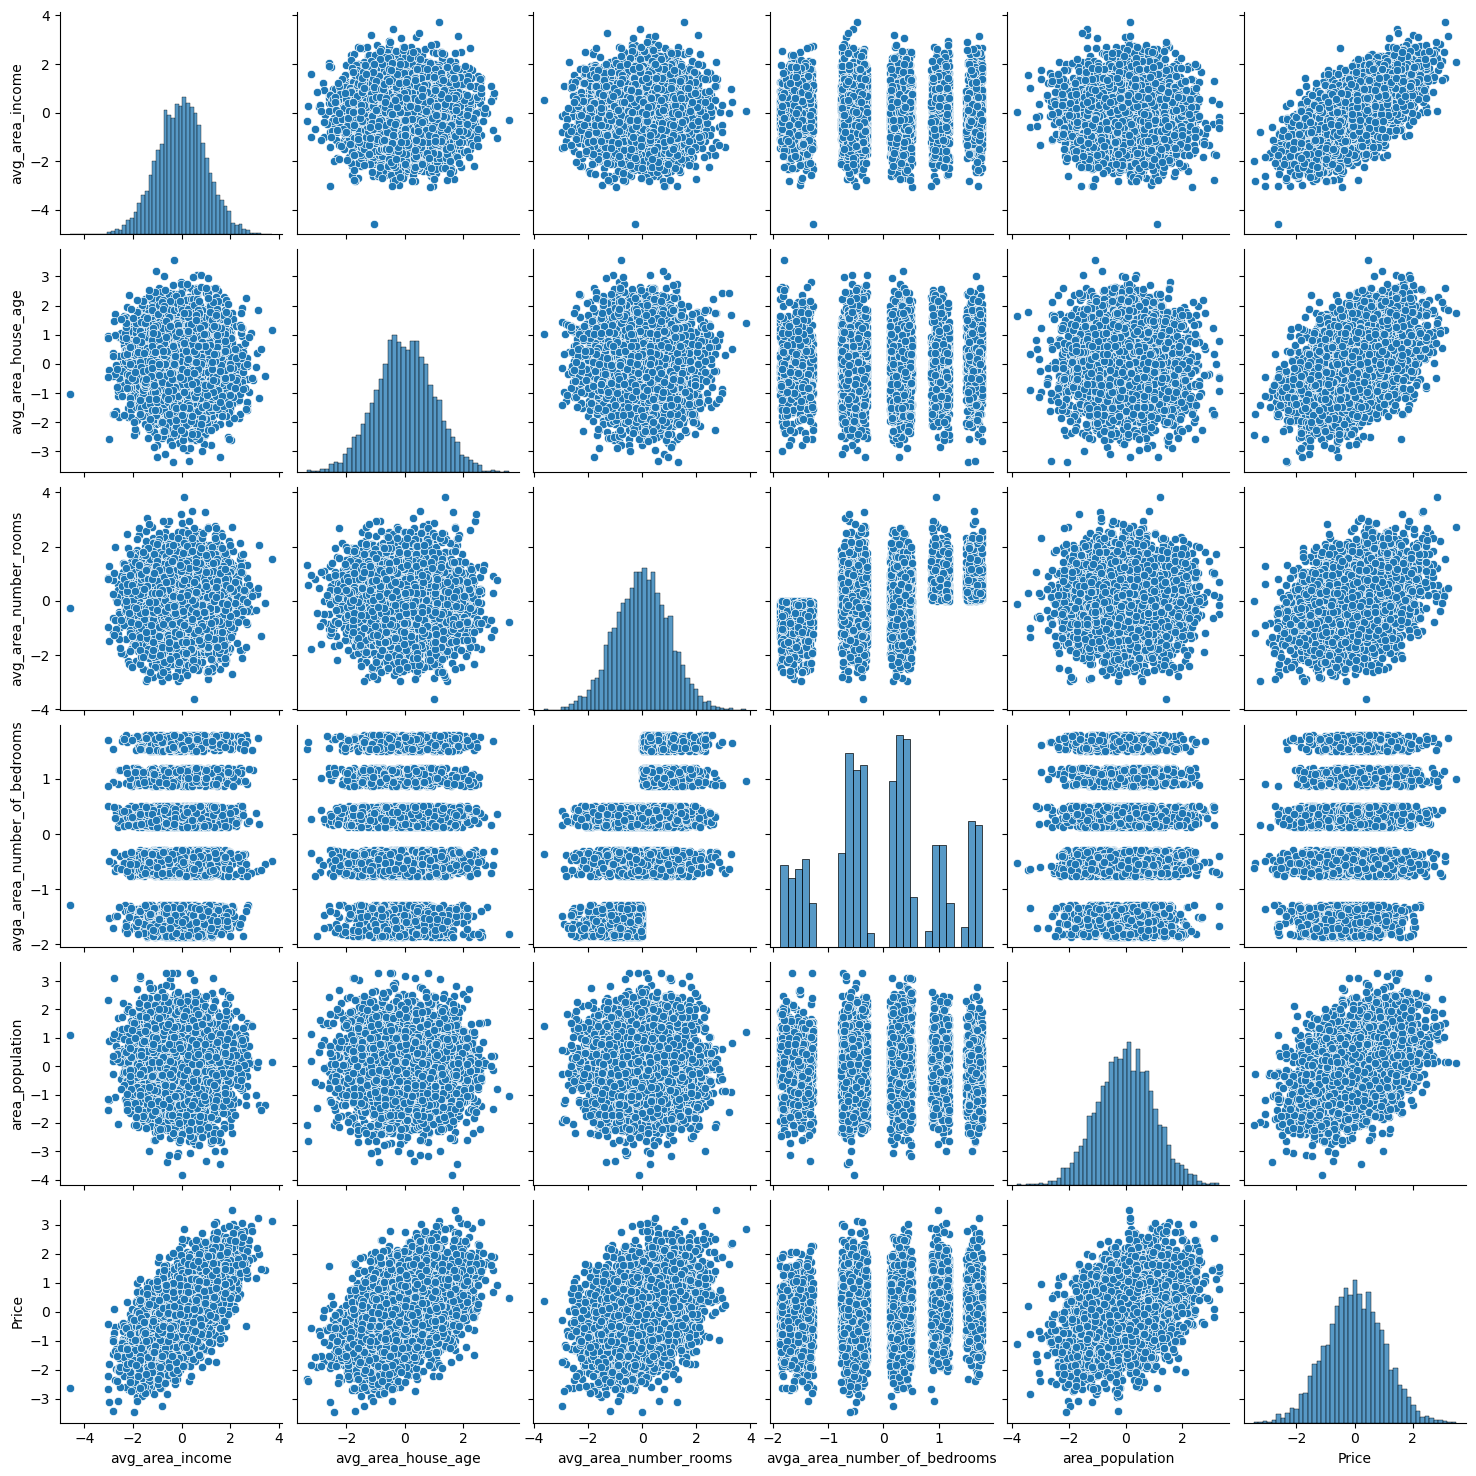

In [ ]:
sns.pairplot(data=df)

In [ ]:
df.corr()

,avg_area_income,avg_area_house_age,avg_area_number_rooms,avga_area_number_of_bedrooms,area_population,Price
avg_area_income,1.000000,-0.002028,-0.011029,0.018695,-0.015872,0.639886
avg_area_house_age,-0.002028,1.000000,-0.009236,0.005578,-0.018682,0.452556
avg_area_number_rooms,-0.011029,-0.009236,1.000000,0.461870,0.002096,0.335814
avga_area_number_of_bedrooms,0.018695,0.005578,0.461870,1.000000,-0.020075,0.171056
area_population,-0.015872,-0.018682,0.002096,-0.020075,1.000000,0.408565
Price,0.639886,0.452556,0.335814,0.171056,0.408565,1.000000


In [ ]:
df_features=df.drop(columns="Price")
target="Price"

In [ ]:
df[target]

0      -0.488927
1       0.775783
2      -0.489056
3       0.082062
4      -1.704819
          ...   
4995   -0.485638
4996    0.710002
4997   -0.569167
4998   -0.093353
4999    0.190553
Name: Price, Length: 5000, dtype: float64

In [ ]:
df_features.select_dtypes("number").columns

Index(['avg_area_income', 'avg_area_house_age', 'avg_area_number_rooms',
       'avga_area_number_of_bedrooms', 'area_population'],
      dtype='object')

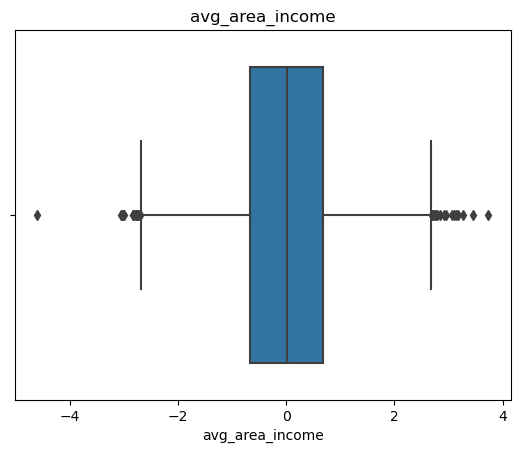

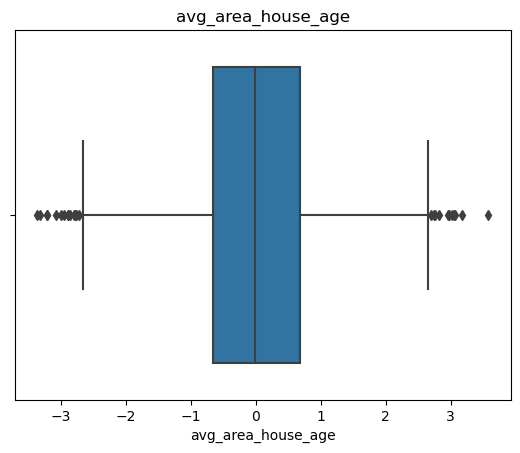

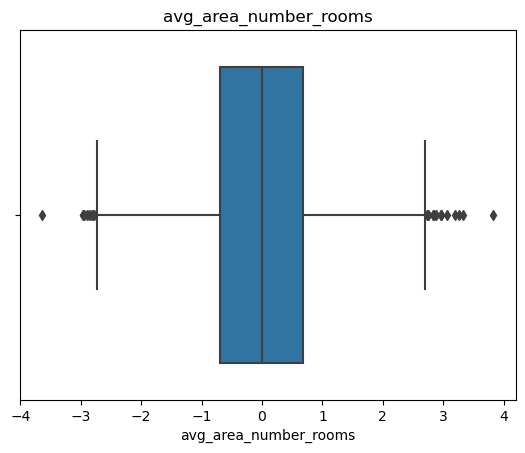

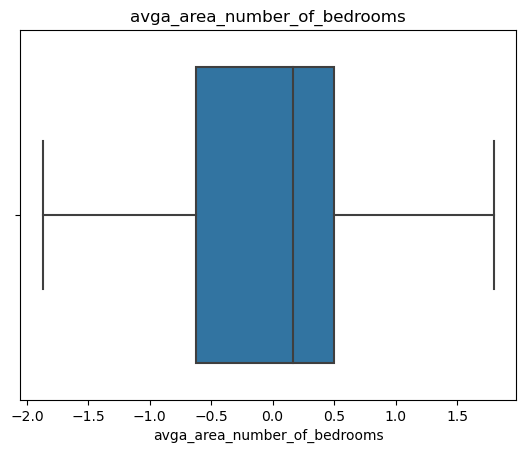

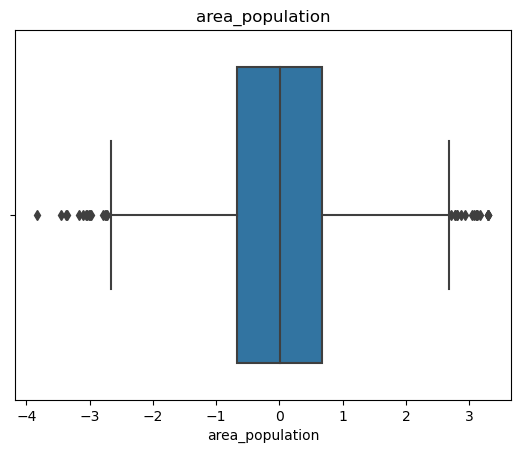

In [ ]:
for col in df_features:
    sns.boxplot(data=df_features, x=col)
    plt.title(col)
    plt.show()

In [ ]:
df.head()

,avg_area_income,avg_area_house_age,avg_area_number_rooms,avga_area_number_of_bedrooms,area_population,Price
0,1.029713,-0.297420,0.014993,0.195726,-1.322298,-0.488927
1,1.001528,0.025388,-0.261635,-0.675596,0.410150,0.775783
2,-0.688390,-0.112821,1.524960,0.954719,0.080534,-0.489056
3,-0.496426,1.221870,-1.387842,-0.515118,-0.178258,0.082062
4,-0.809847,-0.944944,0.845568,0.305432,-0.986459,-1.704819


In [ ]:
df.loc[(df["avg_area_income"]>3) | (df["avg_area_income"]<-3)]

,avg_area_income,avg_area_house_age,avg_area_number_rooms,avga_area_number_of_bedrooms,area_population,Price
39,-4.595386,-1.036641,-0.278413,-1.282209,1.105115,-2.642833
693,3.735530,1.176711,1.530915,-0.487384,0.154524,3.106354
962,3.175954,-1.157520,2.059703,0.187789,-1.351389,1.998157
1459,-3.005469,-2.557674,1.273545,-0.496610,-1.183325,-3.100493
1734,3.444545,-0.405662,-0.061704,-0.552364,-1.376642,1.443902
1891,3.100086,0.376464,0.236874,-0.675596,-0.030986,2.191857
2092,-3.037188,0.966989,0.833707,1.712399,-1.555561,-2.222556
2719,3.144115,1.838619,0.485535,1.735313,0.144937,3.213693
3069,-3.050991,0.886082,-0.964789,0.509914,2.331121,-0.435718
3541,3.268101,0.497980,-1.283476,-0.646856,-1.532882,1.479204


In [ ]:
df=df[~df.apply(is_outliers)]

In [ ]:
df_features=df.drop(columns="Price")

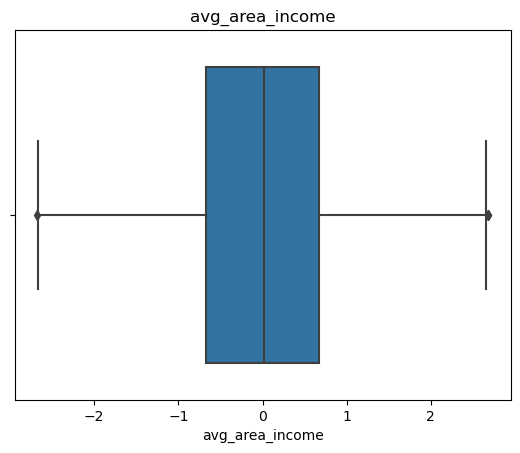

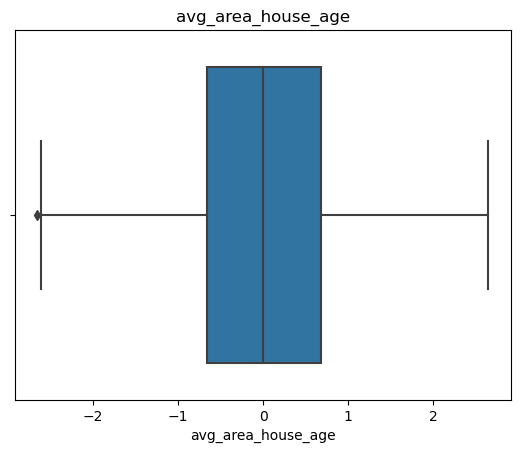

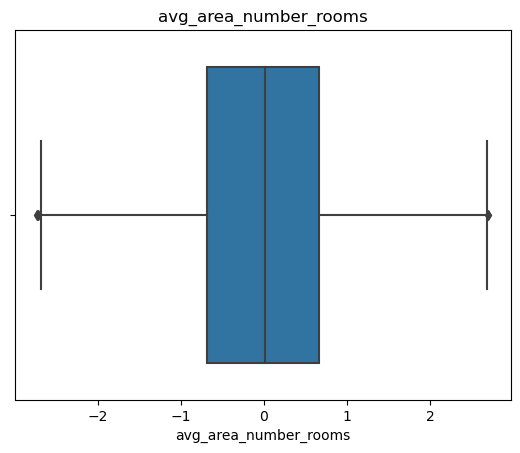

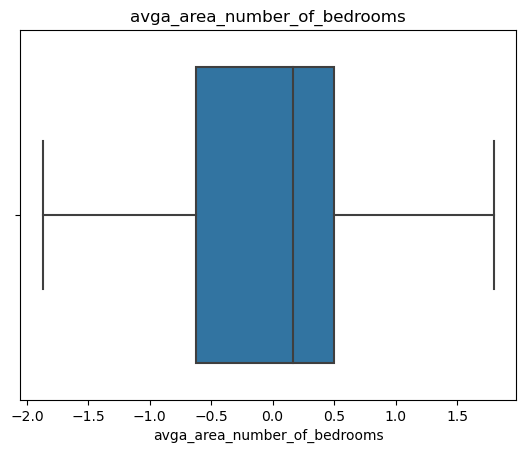

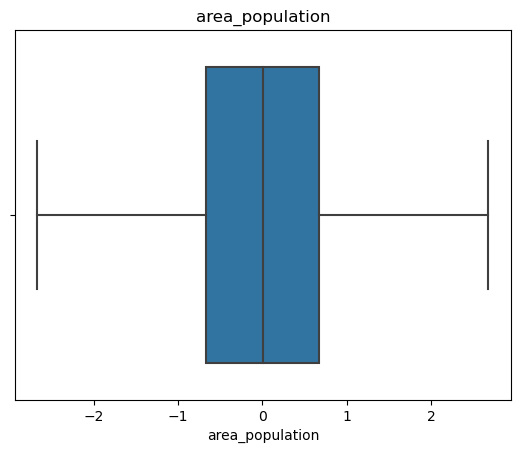

In [ ]:
for col in df_features:
    sns.boxplot(data=df_features, x=col)
    plt.title(col)
    plt.show()

In [ ]:
df.corr()

,avg_area_income,avg_area_house_age,avg_area_number_rooms,avga_area_number_of_bedrooms,area_population,Price
avg_area_income,1.000000,-0.004089,-0.016781,0.018771,-0.002418,0.621333
avg_area_house_age,-0.004089,1.000000,-0.013376,0.006580,-0.017854,0.433859
avg_area_number_rooms,-0.016781,-0.013376,1.000000,0.467276,-0.001426,0.322163
avga_area_number_of_bedrooms,0.018771,0.006580,0.467276,1.000000,-0.020674,0.165836
area_population,-0.002418,-0.017854,-0.001426,-0.020674,1.000000,0.393999
Price,0.621333,0.433859,0.322163,0.165836,0.393999,1.000000


In [ ]:
clean_dataset(df)

,avg_area_income,avg_area_house_age,avg_area_number_rooms,avga_area_number_of_bedrooms,area_population,Price
0,1.029713,-0.297420,0.014993,0.195726,-1.322298,-0.488927
1,1.001528,0.025388,-0.261635,-0.675596,0.410150,0.775783
2,-0.688390,-0.112821,1.524960,0.954719,0.080534,-0.489056
3,-0.496426,1.221870,-1.387842,-0.515118,-0.178258,0.082062
4,-0.809847,-0.944944,0.845568,0.305432,-0.986459,-1.704819
...,...,...,...,...,...,...
4995,-0.755350,1.870567,-0.848055,-0.333372,-1.348047,-0.485638
4996,0.929646,1.030902,-0.414308,0.139875,-1.062092,0.710002
4997,-0.492182,1.284847,-2.146350,-1.710279,-0.283636,-0.569167
4998,-0.060470,-0.447140,0.135492,1.159011,0.654766,-0.093353


In [ ]:
features_col=df_features.select_dtypes("number").columns

In [ ]:
df[features_col]

,avg_area_income,avg_area_house_age,avg_area_number_rooms,avga_area_number_of_bedrooms,area_population
0,1.029713,-0.297420,0.014993,0.195726,-1.322298
1,1.001528,0.025388,-0.261635,-0.675596,0.410150
2,-0.688390,-0.112821,1.524960,0.954719,0.080534
3,-0.496426,1.221870,-1.387842,-0.515118,-0.178258
4,-0.809847,-0.944944,0.845568,0.305432,-0.986459
...,...,...,...,...,...
4995,-0.755350,1.870567,-0.848055,-0.333372,-1.348047
4996,0.929646,1.030902,-0.414308,0.139875,-1.062092
4997,-0.492182,1.284847,-2.146350,-1.710279,-0.283636
4998,-0.060470,-0.447140,0.135492,1.159011,0.654766


In [ ]:
preprocessing=ColumnTransformer([
    ("scaler", RobustScaler(), features_col)
])

In [ ]:
preprocessing.fit(df_features)

ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                 Index(['avg_area_income', 'avg_area_house_age', 'avg_area_number_rooms',
       'avga_area_number_of_bedrooms', 'area_population'],
      dtype='object'))])

In [ ]:
pd.DataFrame(
preprocessing.transform(df_features),
columns=preprocessing.get_feature_names_out())

,scaler__avg_area_income,scaler__avg_area_house_age,scaler__avg_area_number_rooms,scaler__avga_area_number_of_bedrooms,scaler__area_population
0,0.759841,-0.219524,0.005048,0.028162,-0.993097
1,0.738736,0.022881,-0.199406,-0.742717,0.297140
2,-0.526638,-0.080904,1.121055,0.699661,0.051659
3,-0.382899,0.921350,-1.031778,-0.600738,-0.141076
4,-0.617582,-0.705767,0.618921,0.125222,-0.742982
...,...,...,...,...,...
4995,-0.576776,1.408473,-0.632825,-0.439943,-1.012274
4996,0.684912,0.777947,-0.312246,-0.021251,-0.799310
4997,-0.379721,0.968641,-1.592386,-1.658125,-0.219556
4998,-0.056465,-0.331953,0.094109,0.880403,0.479317


In [ ]:
X_train, X_test, y_train, y_test= tts( df[features_col], df[target], random_state=0, test_size=0.25)

In [ ]:
X_train

,avg_area_income,avg_area_house_age,avg_area_number_rooms,avga_area_number_of_bedrooms,area_population
3911,0.189223,1.287661,-0.638505,-1.496777,-1.357739
727,0.052190,-0.371882,-0.419715,0.343989,-0.504371
1735,-1.688787,0.012768,-0.025718,-0.743384,1.399875
4077,0.511909,1.505551,0.004776,-0.387131,-0.366405
1710,-1.546379,-0.458302,-0.611190,-0.561724,-0.480483
...,...,...,...,...,...
1062,0.061957,-0.651839,0.315472,-0.387131,-0.668855
3365,0.873421,-1.718532,1.284000,-0.496610,2.323969
1706,0.566517,0.138645,0.727487,0.258735,-1.372343
2691,0.290819,-0.071116,0.082471,0.282143,0.217193


In [ ]:
pipeline=Pipeline([
("preprocessing", preprocessing),
("model", LinearRegression())
])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                                  Index(['avg_area_income', 'avg_area_house_age', 'avg_area_number_rooms',
       'avga_area_number_of_bedrooms', 'area_population'],
      dtype='object'))])),
                ('model', LinearRegression())])

In [ ]:
pipeline.score(X_train, y_train)

0.9107827562209758

In [ ]:
pipeline.predict(X_train)

array([-0.07961914, -0.49439261, -0.5127044 , ...,  0.10239375,
        0.27885567,  0.82559165])

In [ ]:
pipeline.score(X_test, y_test)

0.9125777365233976

In [ ]:
predict=pipeline.predict(X_test)

In [ ]:
y_test

429     0.392340
4635    0.573472
796    -0.355077
3529   -1.100346
1617    0.552840
          ...   
394     0.435123
3779    0.155255
2673    0.027628
2041   -0.964841
1470   -0.970159
Name: Price, Length: 1215, dtype: float64

In [ ]:
tabela=pd.DataFrame()
tabela["target"]=y_test
tabela["predict"]=predict

In [ ]:
tabela

,target,predict
429,0.392340,0.217092
4635,0.573472,0.618755
796,-0.355077,-0.430615
3529,-1.100346,-0.885350
1617,0.552840,0.174818
...,...,...
394,0.435123,0.681020
3779,0.155255,-0.479451
2673,0.027628,0.180581
2041,-0.964841,-1.591776


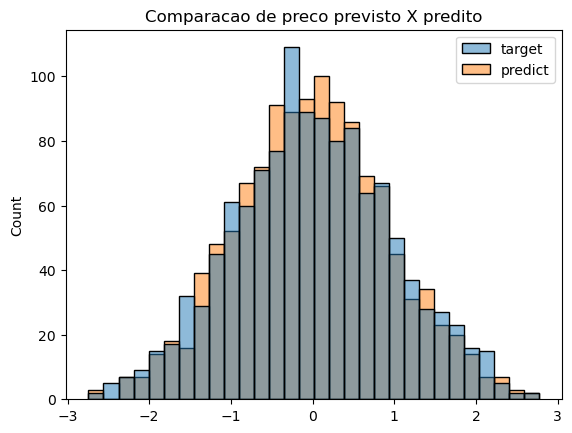

In [ ]:

sns.histplot(data=tabela)
plt.title("Comparacao de preco previsto X predito")
plt.show()